<a href="https://colab.research.google.com/github/codewithswatiee/DS-AI-ML/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


## Univariate Non-Graphical analysis

In [3]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [4]:
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['latitude'] = df['latitude'].astype(str)
df['longitude'] = df['longitude'].astype(str)

In [5]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Categorical

In [6]:
df['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,16621
Brooklyn,16439
Queens,4572
Bronx,875
Staten Island,314


In [7]:
df['neighbourhood_group'].value_counts(normalize = True)

,proportion
neighbourhood_group,
Manhattan,0.428145
Brooklyn,0.423456
Queens,0.117771
Bronx,0.022539
Staten Island,0.008088


In [8]:
df['room_type'].value_counts(normalize = True)

,proportion
room_type,
Entire home/apt,0.523454
Private room,0.454754
Shared room,0.021792


In [9]:
df['neighbourhood'].value_counts(normalize = True)

,proportion
neighbourhood,
Williamsburg,0.081477
Bedford-Stuyvesant,0.080910
Harlem,0.056773
Bushwick,0.050024
Hell's Kitchen,0.039360
...,...
Olinville,0.000052
New Dorp Beach,0.000052
Richmondtown,0.000026


In [10]:
df_n = df['neighbourhood'].value_counts().reset_index()
df_n.columns = ['neighbourhood', 'count']
df_n

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Olinville,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [11]:
df_n[df_n["count"] > 1000]

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265


Numerical

In [12]:
df['price'].value_counts(bins = 5)

,count
"(-10.001, 2000.0]",38786
"(2000.0, 4000.0]",20
"(4000.0, 6000.0]",8
"(8000.0, 10000.0]",5
"(6000.0, 8000.0]",2


In [13]:
bins = (0, 50, 100, 200, 500, 2000, 10000)
df['price'].value_counts(bins = bins)

,count
"(50.0, 100.0]",14212
"(100.0, 200.0]",13544
"(200.0, 500.0]",5267
"(-0.001, 50.0]",5176
"(500.0, 2000.0]",587
"(2000.0, 10000.0]",35


In [14]:
print(df['price'].mean())
print(df['price'].std())
print(df['price'].skew())
print(df['price'].kurt())

142.33252621004095
196.99475591833985
23.673594295123014
953.4807356344944


In [15]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Print the correlation matrix
print(correlation_matrix)

                                   price  minimum_nights  number_of_reviews  \
price                           1.000000        0.025501          -0.035924   
minimum_nights                  0.025501        1.000000          -0.069366   
number_of_reviews              -0.035924       -0.069366           1.000000   
reviews_per_month              -0.030623       -0.121712           0.549699   
calculated_host_listings_count  0.052895        0.073474          -0.059796   
availability_365                0.078276        0.101658           0.193409   

                                reviews_per_month  \
price                                   -0.030623   
minimum_nights                          -0.121712   
number_of_reviews                        0.549699   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.009442   
availability_365                         0.185896   

                                calculated_host_listings_count  \
price   

## Univariate Analysis (Categorical)

In [16]:
data = pd.read_csv('/content/AB_NYC_2019.csv')
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355


Bar Graph

<Axes: xlabel='neighbourhood_group', ylabel='count'>

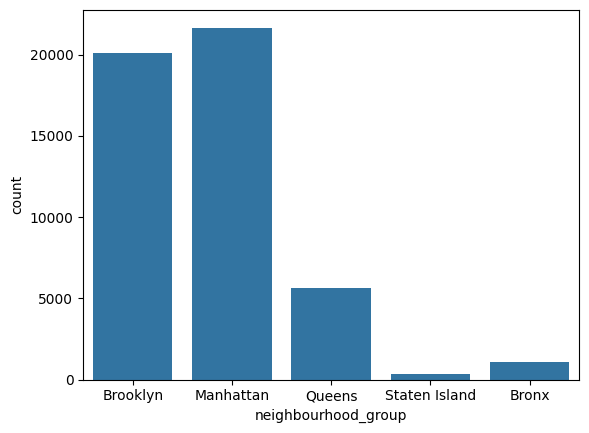

In [17]:
sns.countplot(data=data, x = 'neighbourhood_group')

<Axes: xlabel='room_type', ylabel='count'>

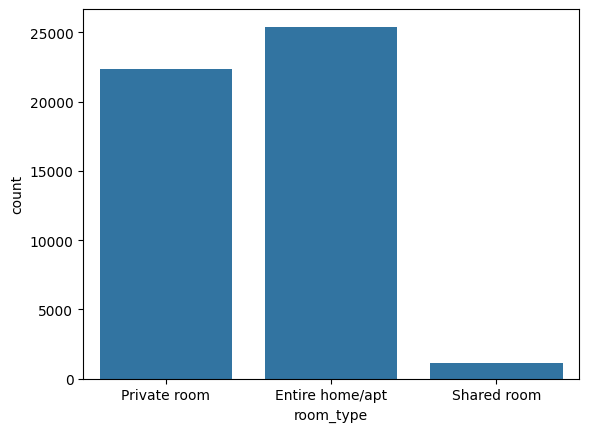

In [18]:
sns.countplot(data=data, x = 'room_type')

<Axes: xlabel='neighbourhood_group', ylabel='count'>

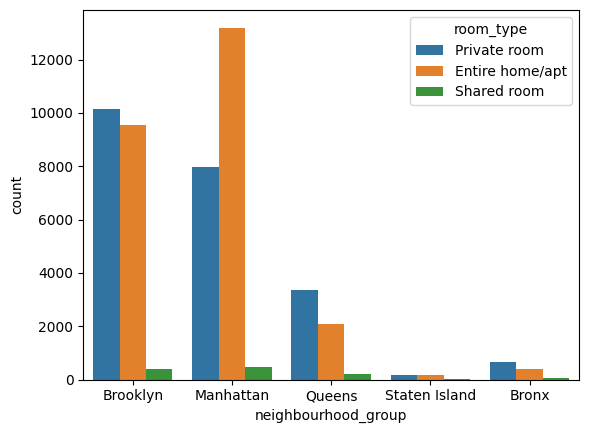

In [19]:
sns.countplot(data=data, x = 'neighbourhood_group', hue='room_type')

Pie Chart

<Axes: ylabel='count'>

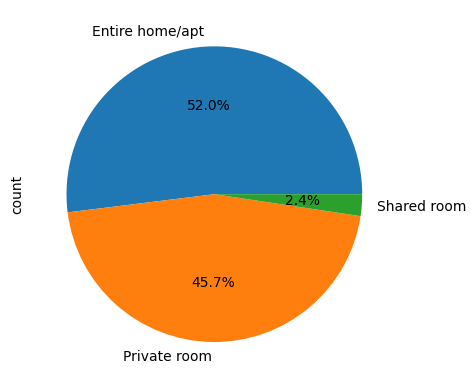

In [20]:
data['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [21]:
df2 = sns.load_dataset('titanic')
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='count'>

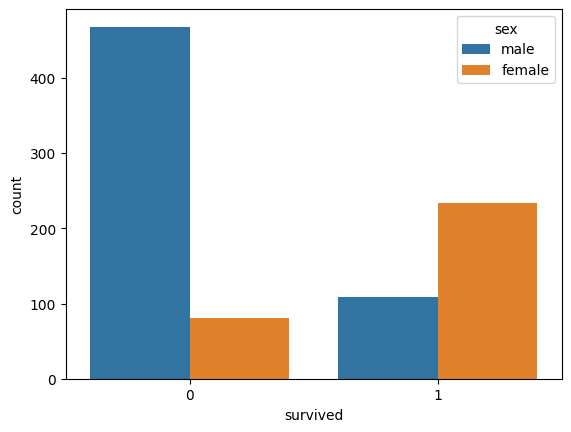

In [22]:
sns.countplot(data=df2, x = 'survived', hue='sex')

## Univariate Visualization (Numerical)

<Axes: xlabel='price', ylabel='Count'>

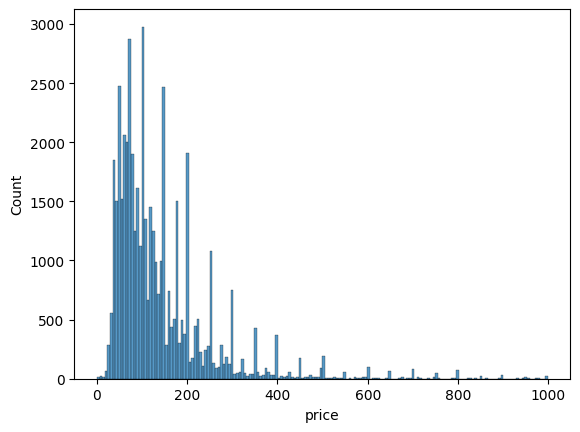

In [23]:
sns.histplot(data=data[data['price'] < 1000], x = 'price')

<ipython-input-24-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

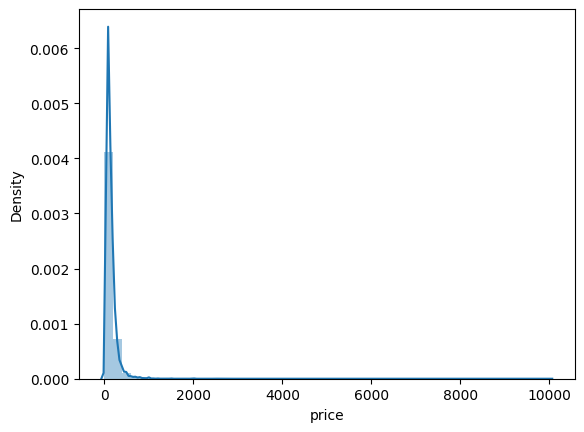

In [24]:
sns.distplot(df['price'])

<Axes: xlabel='price'>

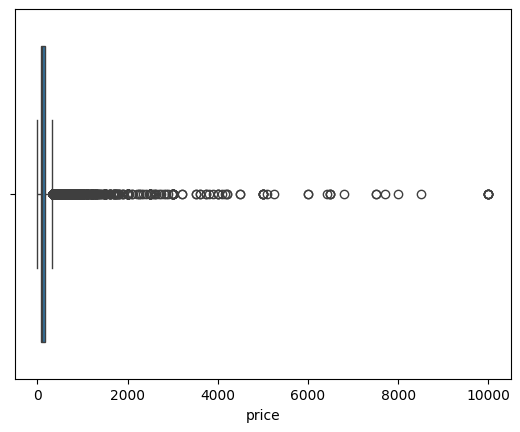

In [25]:
sns.boxplot(data=data, x = 'price')

<Axes: xlabel='price'>

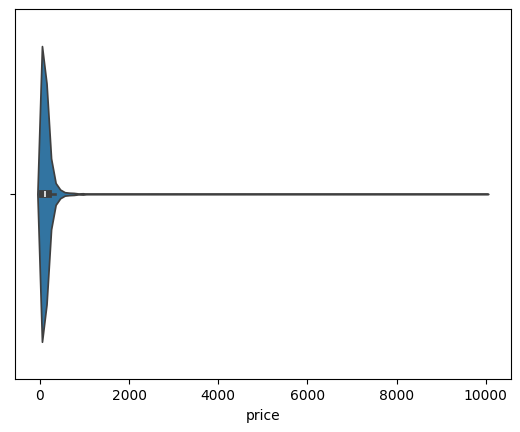

In [26]:
sns.violinplot(data=data, x = 'price')